In [ ]:
# this function really makes use of the code found in "cloud backscatter to height test.ipynb" to create these figures!

In [1]:
# import modules
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import warnings

os.chdir("/Users/etmu9498/research/code/scripts")
import tc_metadata
import helper_fns
import make_plots_new_heights
import cloud_height

In [2]:
# setup: choose the 9/29 eye pass 1 dataset
metadata = tc_metadata.all_data( tc='sam')
crl_path = metadata['um_crl_path']
crl_name = 'crl-sam-09-29-eye-1.nc'
dataset = 5

# load data and helpful values
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)
xaxis_data = crl_data.in_situ_distance.values
dist0 = metadata[ 'in_situ_eyewall_dists'][dataset][ 0] # eyewall limit 0
dist1 = metadata[ 'in_situ_eyewall_dists'][dataset][ 1] # eyewall limit 1

# find the indices and values in the crl distance dataset closest to the eyewall_dists limits
i1, x1 = helper_fns.closest_val( xaxis_data, dist0)
i2, x2 = helper_fns.closest_val( xaxis_data, dist1)

# cloud heights within the specified axes
# ignore counts for here
# find only the uppermost cloud peak
cloud_heights, xaxis = cloud_height.find_cloud_heights( crl_name, -30, i1, i2, xaxis='in-situ-dist', crl_path=crl_path, new_heights=True)
# old way includes multiple cloud heights... maybe do this instead?
# cloud_heights, xaxis, counts = cloud_height.find_cloud_heights( crl_name, -30, i1, i2, crl_path=crl_path, new_heights=True)


# setup for plotting
power = crl_data.power_new[i1:i2].values
dist = crl_data.in_situ_distance[i1:i2].values
profile = 35 # 60, 25 # cloud height ex profile to be displayed


# index where chosen distance equals return index... works for rainfall_positions and xaxis!
# xinds = np.where( xaxis == dist[ profile])[0]
# xinds = np.where( xaxis == dist[ profile])[0]

print( xaxis[ profile])
print( cloud_heights[ profile])

<xarray.DataArray 'in_situ_distance' ()>
array(-23.83705)
Coordinates:
    in_situ_distance  float64 -23.84
    H_max             float64 ...
Attributes:
    long_name:    rmw_negatives
    units:        unitless
    description:  TC center: RMW = 0. Distance from the TC center to the max ...
0.4055600000000825


In [30]:
# locally defined helper fn to make power plot!
def plot_power_ch1( data_path, data_file):
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    # plot crl data using in situ x axis!
    # choose x axis
    xaxis = crl_data.in_situ_distance
    # plot things
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose(), vmin = -30, vmax =-10)

    '''
    # this is how to plot crl data using tdr scale! indicese were off by one in 2nd line
    xaxis = crl_data.tdr_distance
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose()[:, 0:-1], vmin = -30, vmax =-10)
    '''
    
    plt.ylabel( 'Height (km)')    
    cbar = plt.colorbar(label="CRL Return Power ( dBz)")
    
    cbar.ax.set_ylabel( ylabel="CRL Return Power ( dBz)", fontsize=20)
    cbar.ax.tick_params(labelsize=12)

    
    plt.grid( 'on')
    plt.ylim( [ 0, crl_data.H_max + .1])

    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")

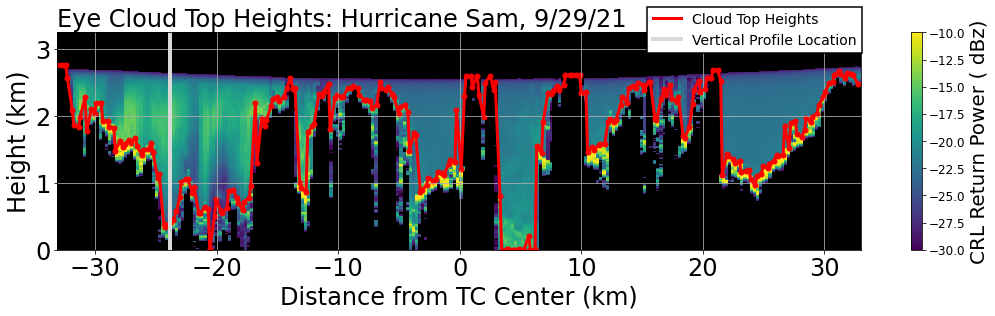

In [34]:
# Make plot 1: cloud heights over crl data!

helper_fns.change_font_sizes(small=24, medium=24)

fig = plt.figure( figsize=(18, 4))

plot_power_ch1( crl_path, crl_name)

plt.scatter( xaxis, cloud_heights, c='r', s=25)
plt.plot( xaxis, cloud_heights, c='r', linewidth=3, label="Cloud Top Heights")

plt.title( "Eye Cloud Top Heights: Hurricane Sam, 9/29/21", loc='left')
plt.xlabel("Distance from TC Center (km)")

plt.xlim( [x1, x2])
# plt.xlim( [-30, -20]) zoom in for testing
plt.axvline( x=crl_data.in_situ_distance[i1:i2][ profile], c='.85', alpha = 1, linewidth=4, label="Vertical Profile Location")
leg = plt.legend( loc='upper right', bbox_to_anchor=(1.01, 1.15), fancybox=False, shadow=False, fontsize=14, facecolor='w', framealpha=1) # 1.3
leg.get_frame().set_linewidth( 1.5) 
leg.get_frame().set_edgecolor('k')

os.chdir( "/Users/etmu9498/research/figures/csu-poster")
plt.savefig( "cloud_top_heights.png", bbox_inches='tight', dpi=500 )

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\dataarray.py:4860: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)


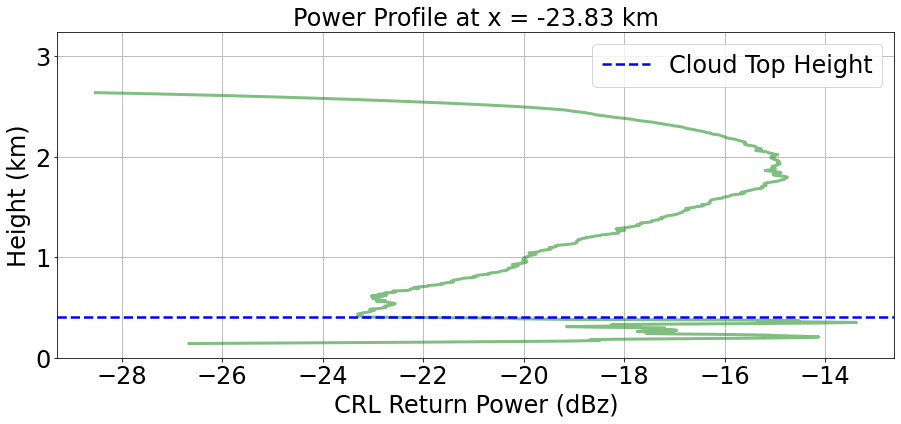

In [36]:
# plot 2: power vs height cross section for selected x axis location!

plt.figure( figsize=( 15, 6))

helper_fns.change_font_sizes(small=24, medium=24)

plt.plot( power[ profile], - crl_data.H_new, c='g', linewidth=3, alpha=.5)

crl_path = metadata['um_crl_path']
crl_name = 'crl-sam-09-29-eye-1.nc'
os.chdir(crl_path)
crl_data = xr.open_dataset(crl_name)

plt.grid('on')
plt.xlabel( "CRL Return Power (dBz)")
plt.ylabel( "Height (km)")
plt.title( "Power Profile at x = " + str( dist[ profile] )[0:6] + " km")

plt.ylim( [ 0, crl_data.H_max + .1])
# plt.ylim( [1.4, 1.6]) zoom in on point
# plt.xlim()

height = cloud_heights[ profile]
idx = (np.abs( -crl_data.H_new - height )).argmin().values

plt.axhline( y=height, c='b', linewidth=2.5, alpha=1, label='Cloud Top Height', linestyle='--')
# plt.scatter( power[ profile][idx], height, c='r', s=50, alpha=1, label='Cloud Top Height')

plt.legend()

'''
# plot where the cloud layer(s) is(are) on the power profile!
for xind in xinds:
    # height of cloud layer
    height = cloud_heights[ xind]
    # closest height value in crl data
    idx = (np.abs( -crl_data.H_new - height )).argmin().values

    plt.scatter( power[ profile][ idx], height, c='r', s=50, alpha=1)
'''

os.chdir( "/Users/etmu9498/research/figures/csu-poster")
plt.savefig( "cloud_top_profile.png", dpi=500 )